In [ ]:
!pip install mlxtend

In [3]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from datetime import datetime
import sklearn
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans , k_means
from IPython.display import Image, display, HTML
import warnings
warnings.filterwarnings('ignore')

## 1. DATA UNDERSTANDING

In [4]:
main_data= pd.read_csv("./ECommerce.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [10]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [9]:
df['days_since_prior_order'].unique()

array([-1.,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [8]:
df['days_since_prior_order'].fillna(-1,inplace=True) 

In [11]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

## 2. DATA PREPARATION

In this section we will be doing the following steps:
<ul>
    <li>Investigating all elements within each feature</li>
    <li>Aggregating & grouping values to visualize purchasing behaviour</li>
    <li>Aggregating & grouping values to understand purchasing behaviour</li>
    <li>Aggregating & grouping values to visualize & identify the most reordered items</li>
    <li>Aggregating & grouping values to understand product reordered ratio</li>
    <li>Aggregating & grouping values to visualize reordered ratio</li>
</ul>

In [13]:
# Investigating all elements within each feature

for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

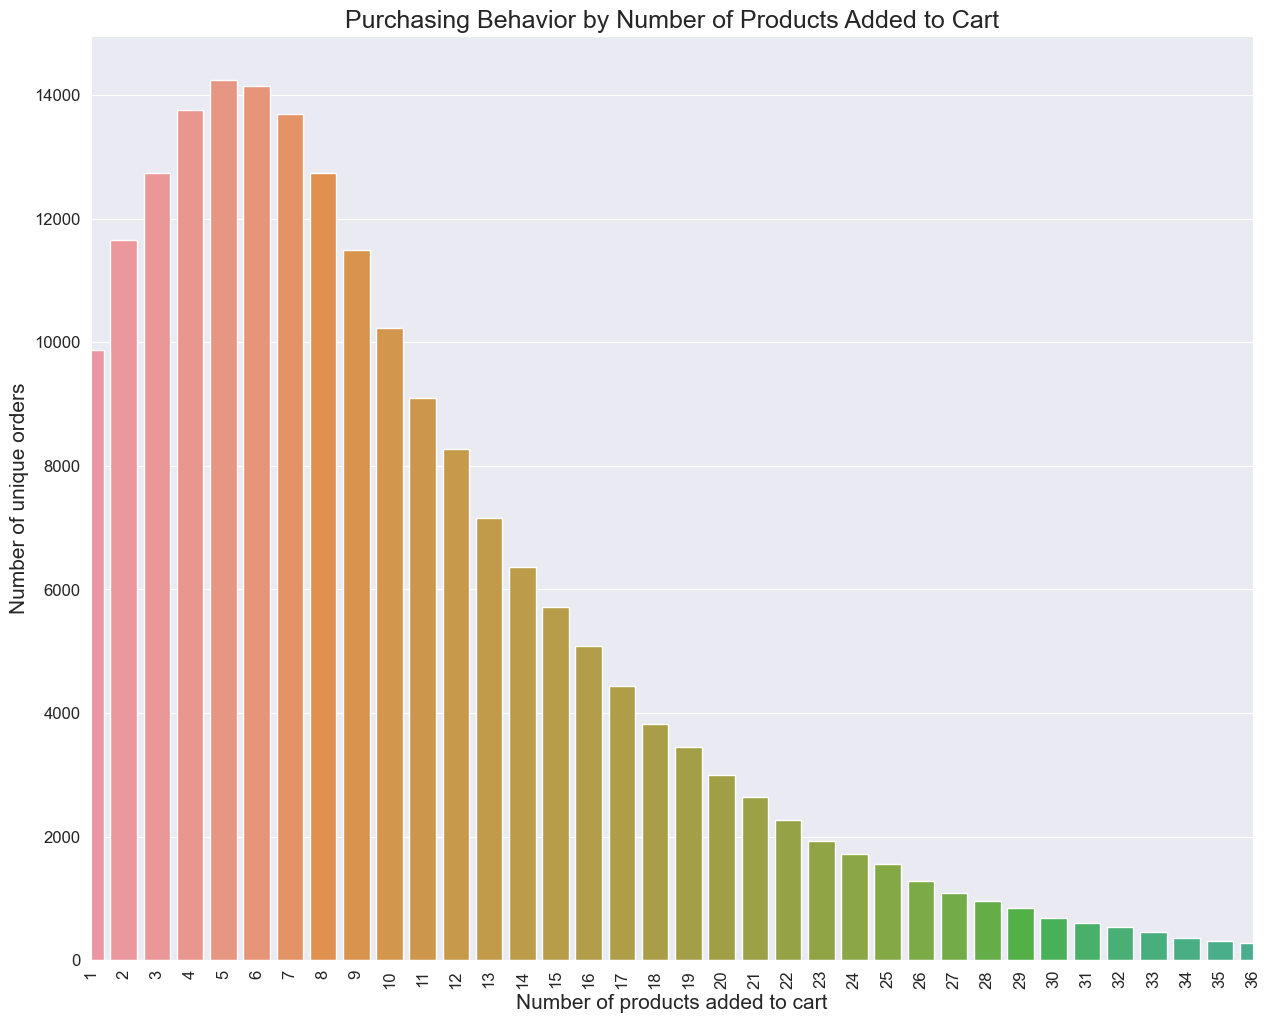

In [14]:
# Aggregating & grouping values to visualize purchasing behaviour
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18)
plt.xlim(0, 35)  # limit the X axis values to 35
plt.show()

<b>Note:</b>
</br>
From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.

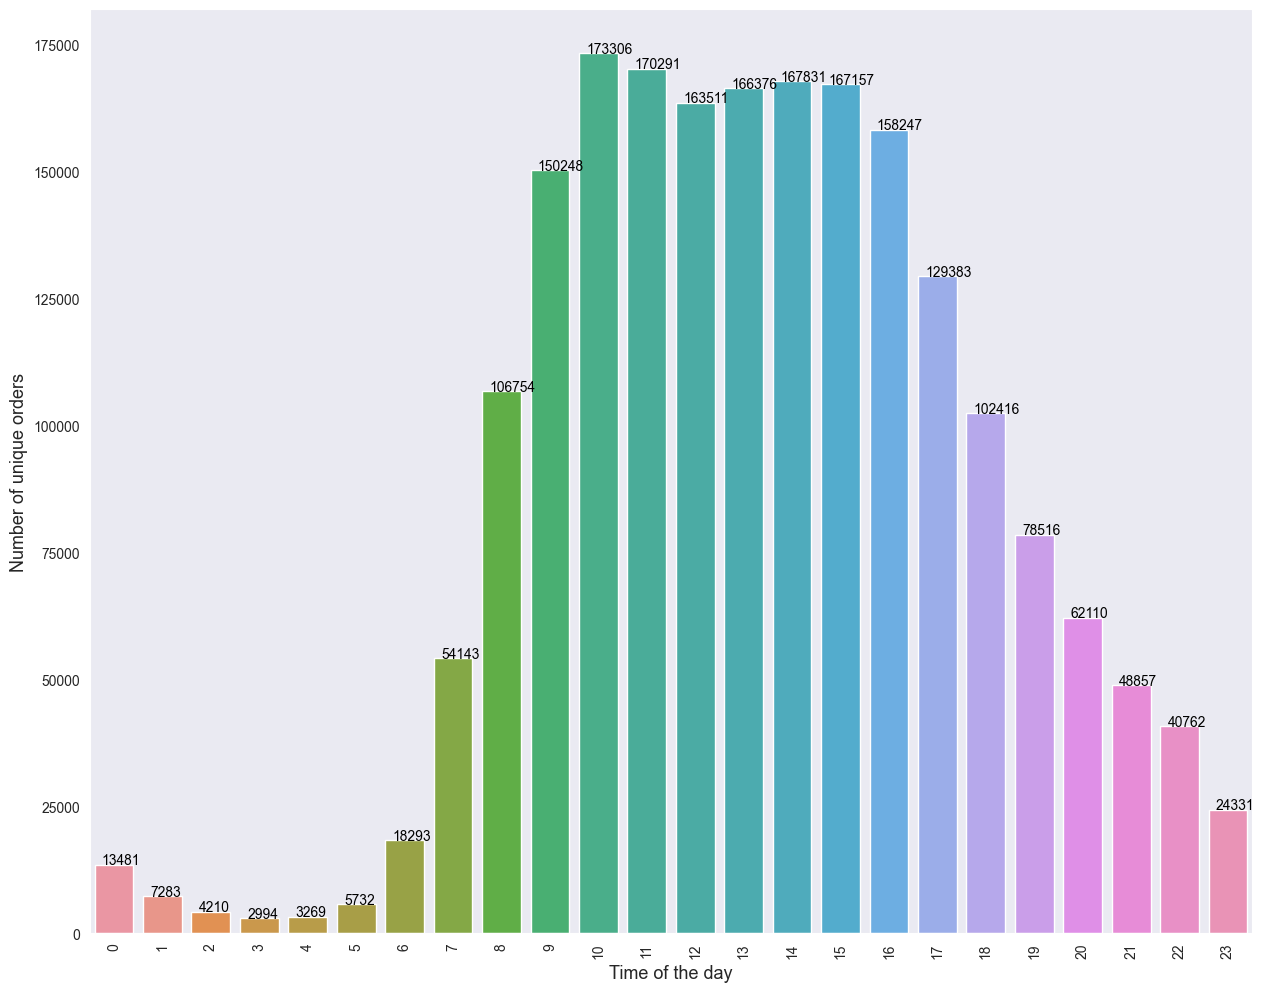

In [15]:
# Creating time based features
# TIME OF THE DAY WHEN THE ORDER WAS MADE
grouped = df.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id)
sns.color_palette("rocket_r", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Time of the day', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

plt.show()

### NOTE :
As we continue to explore further we can observe interesting trends which are as follows:
<ul>
    <li>The peak traffic is on a Monday between 10 AM - 16 PM which is the beginning of the week</li>
    <li>The low periods happen to be during the mid-week from Wednesday - Friday From 4 PM onwards</li>
</ul>

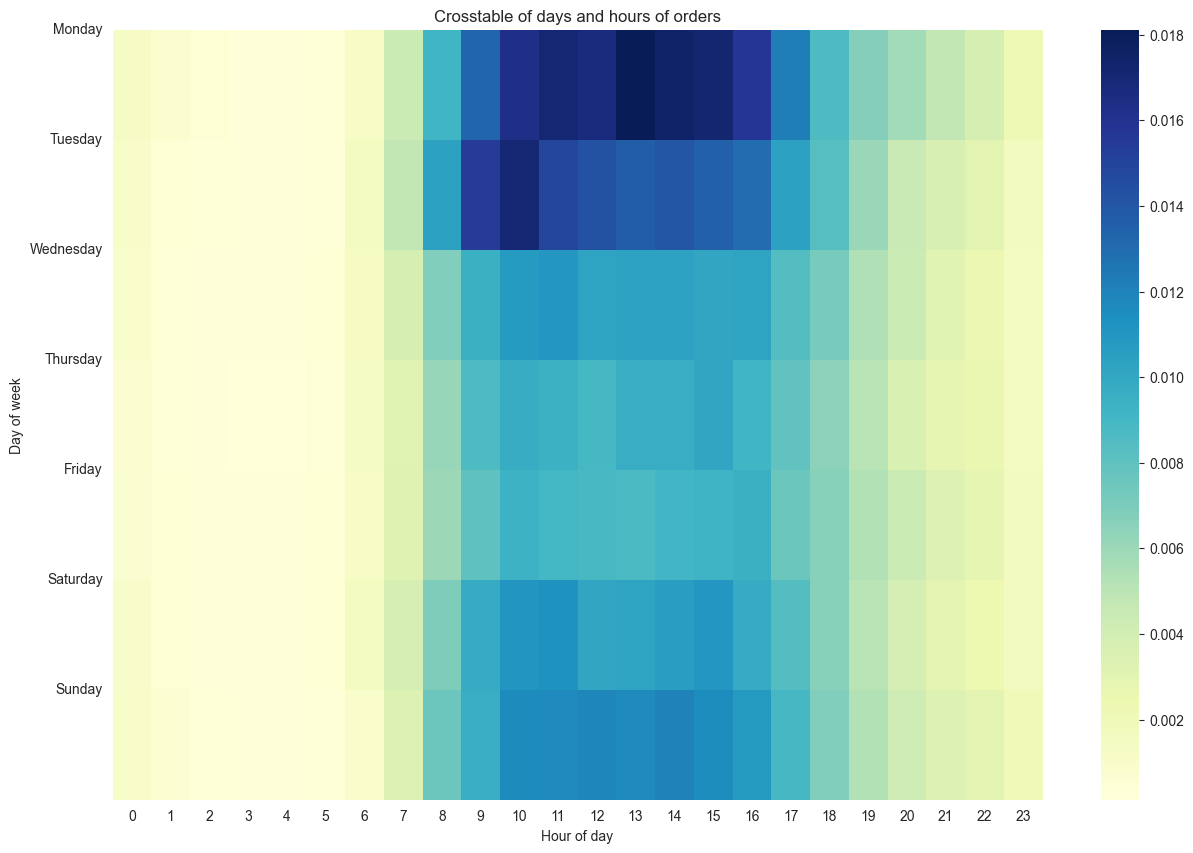

In [16]:
# Heatmap Study
day_hour_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number')/df.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(day_hour_df_piv, cmap='YlGnBu')
plt.yticks([0,1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Hour of day")
plt.yticks(rotation=0)
plt.ylabel("Day of week")


plt.title("Crosstable of days and hours of orders");

In [17]:
def order_time(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'

df['order_time_period'] = df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [18]:
df.pivot_table(index='order_dow',columns='order_time_period',values='user_id',aggfunc=['count'])

count                       
order_time_period afternoon evening morning  night
order_dow                                         
0                    196603   60195  123876  11157
1                    158970   51825  129591   8850
2                    120927   45497   87562   7926
3                    112185   41737   77609   7199
4                    107170   45359   74338   8017
5                    121577   42311   89662   8607
6                    135073   45737   90397   9544

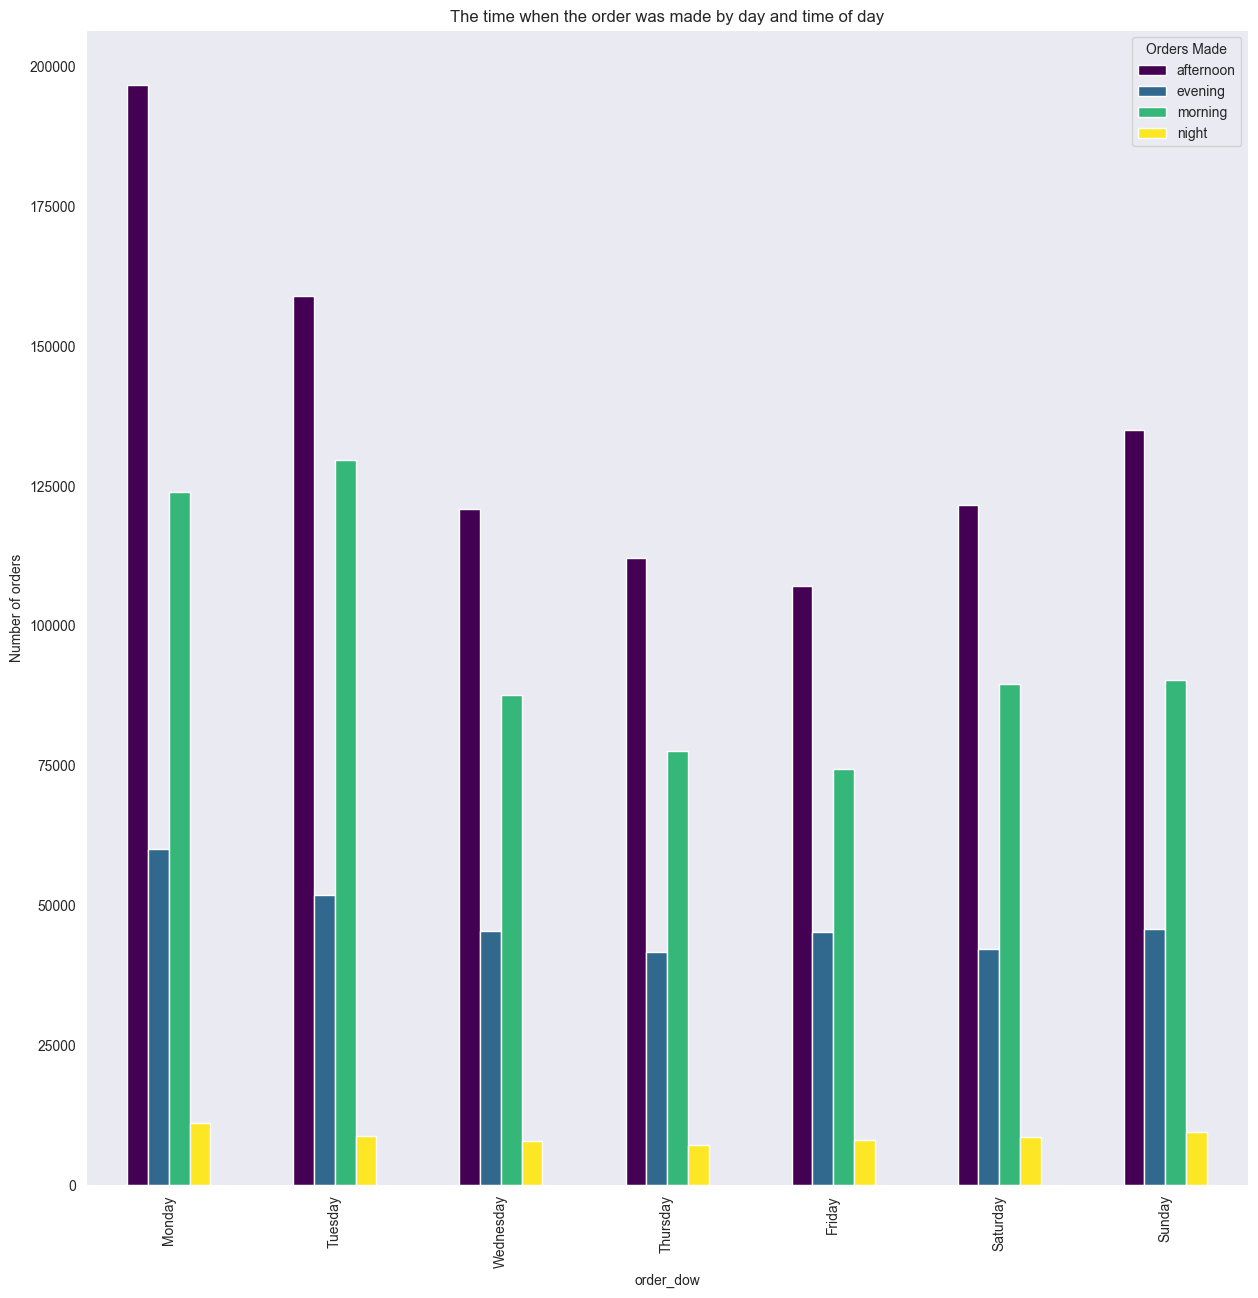

In [19]:
# Visualizing order time period
# Define the color palette
color_palette = plt.get_cmap('viridis')

# Generate the plot
orders_by_day_time = df.pivot_table(
    index='order_dow',
    columns='order_time_period',
    values='user_id',
    aggfunc='count'
)

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 15), color=color_palette(np.linspace(0, 1, len(orders_by_day_time.columns))))
ax.set_title('The time when the order was made by day and time of day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # fixed the x-axis labels
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made', bbox_to_anchor=(1.0, 1.0))
plt.show()

### NOTE :
The above plot again give us a global overview where we can observe trends:
<ul>
    <li>Where most customers prefer to order between morning and early afternoon</li>
    <li>Relatively quiet few customers order during evenig and night</li>
</ul>

In [20]:
# Creating order group feature
def order_number_group(num_orders):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for r in ranges:
        if num_orders in range(r[0], r[1]+1):
            return f"{r[0]}-{r[1]} orders"
    return "More than 100 orders"

df['order_number_group']=df['order_number'].apply(order_number_group)
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50 orders


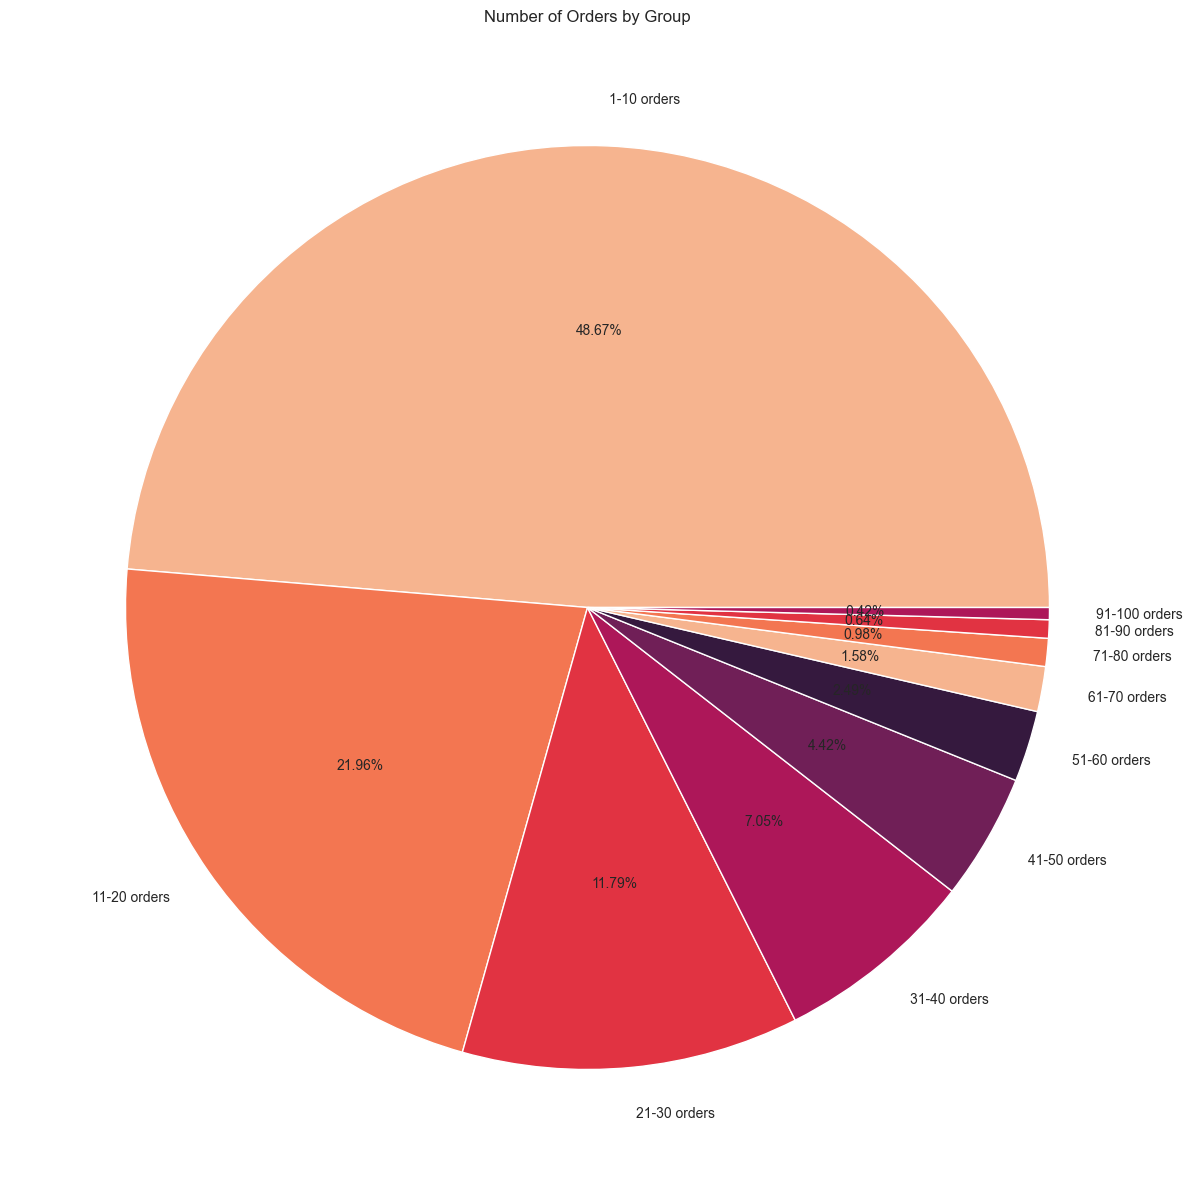

In [21]:
# Visualizing order group feature
orders_by_group = df.groupby('order_number_group')['user_id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('lightgray')

orders_by_group.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by Group', ax=ax)
ax.set_ylabel('')

plt.show()


### NOTE :
The above pie chart give us a global overview of market basket analysis trend:
<ul>
    <li>Out of all the products, approximately 49% were purchased from the category 1-10 group</li>
</ul>

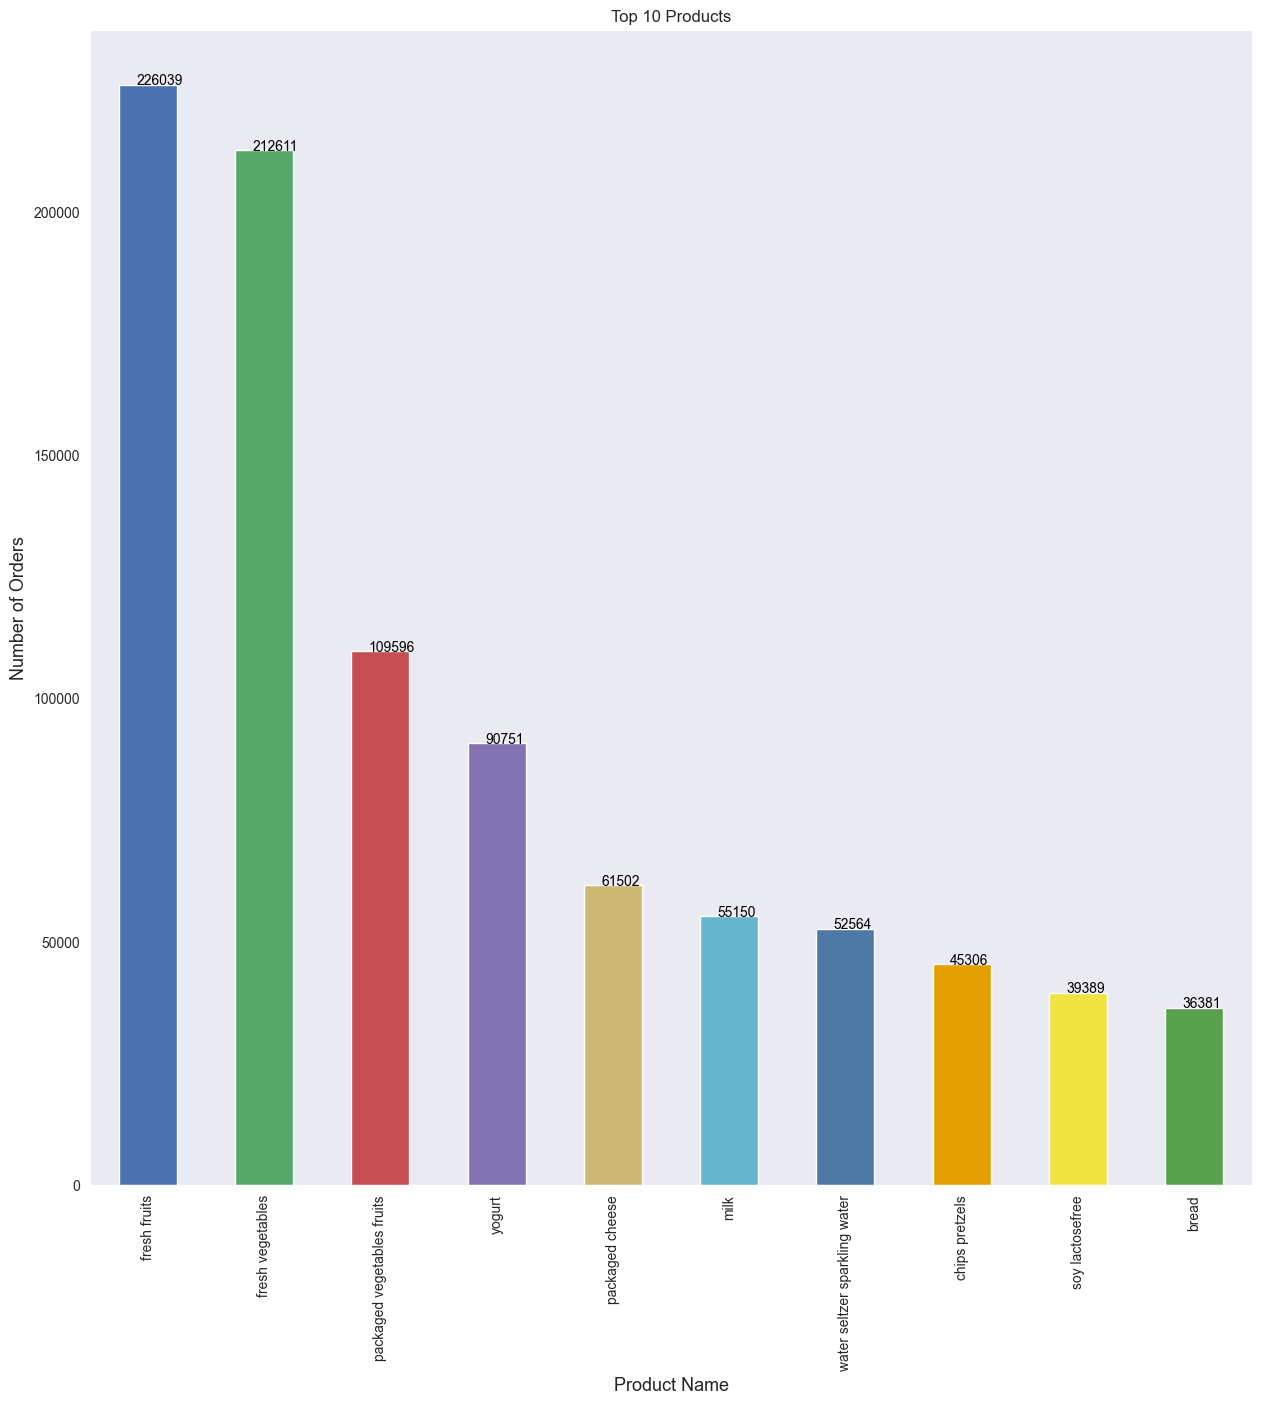

In [22]:
# Visualizing top 10 products
top_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = top_products.plot(kind='bar', title='Top 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

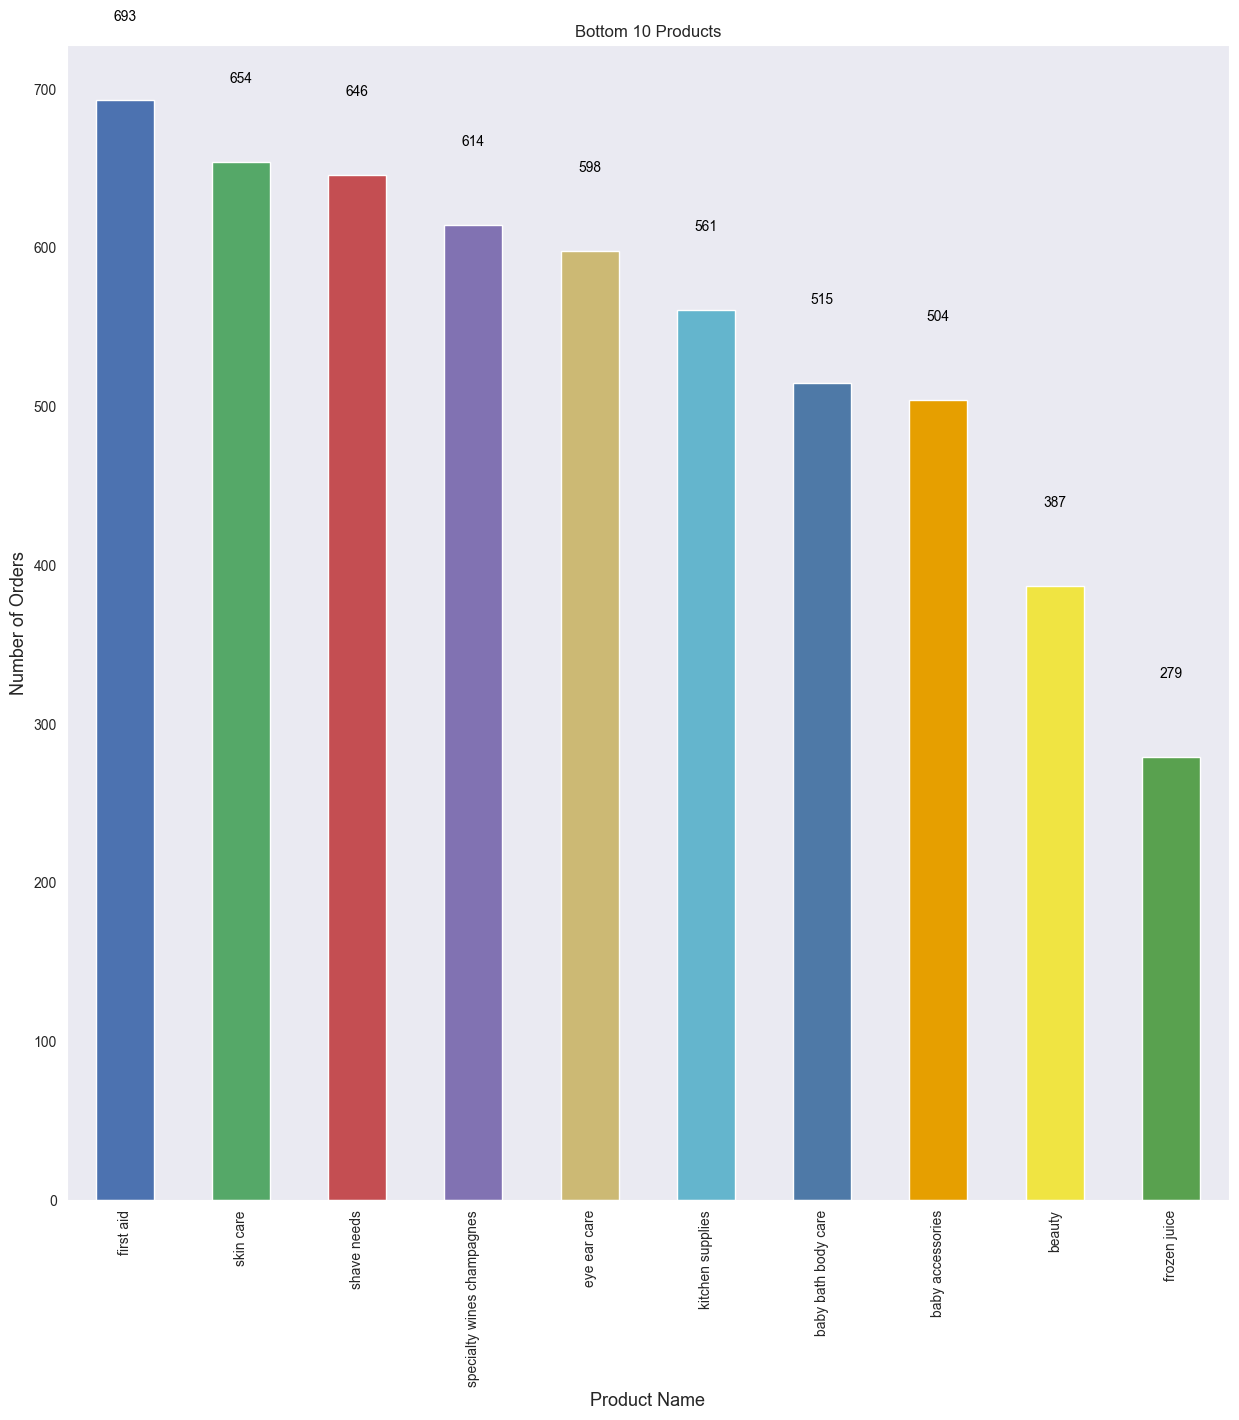

In [23]:
# Visualizing bottom 10 products
bottom_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = bottom_products.plot(kind='bar', title='Bottom 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

In [24]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department","order_time_period"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
del grouped["index"]
grouped

,product_id,product_name,department,order_time_period,reordered
0,24,fresh fruits,produce,afternoon,104177
1,83,fresh vegetables,produce,afternoon,102115
2,24,fresh fruits,produce,morning,77479
3,83,fresh vegetables,produce,morning,68634
4,123,packaged vegetables fruits,produce,afternoon,51493
5,120,yogurt,dairy eggs,afternoon,41484
6,24,fresh fruits,produce,evening,37544
7,123,packaged vegetables fruits,produce,morning,36210
8,83,fresh vegetables,produce,evening,35026
9,120,yogurt,dairy eggs,morning,31412


<b>NOTE :</b>
From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested to purchase

In [25]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


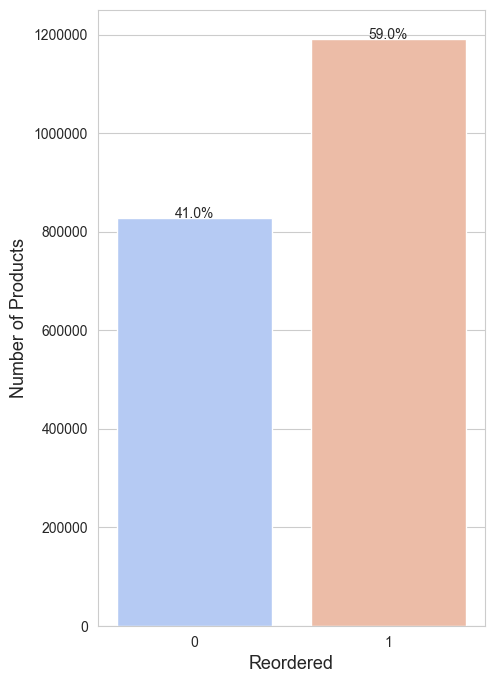

In [26]:
# Aggregating & grouping values to visualize reordered ratio
grouped = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=True)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')

grouped_pct = grouped/grouped.sum() * 100
for i, v in enumerate(grouped.values):
    ax.text(i, v+3, f'{grouped_pct.values[i]:.1f}%', ha='center', fontsize=10)

plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<b>NOTE :</b>
From the above we can see that 59 % of products were reordered by customers.

## 3. MODELING

In [28]:
pd.set_option('display.max_colwidth', -1)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50 orders


In [30]:
# Building customized plot parameters 
def bar_plot(df,col):
    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
        xaxis_title= col,
        yaxis_title="Count",
        legend_title=col,
        font_family="Courier New",
        font_color="blue",
        title_font_family="Times New Roman",
        title_font_color="red",
        legend_title_font_color="green"
    )
    fig.show()

In [31]:
# PRODUCT BAR PLOT 
bar_plot(df, 'product_name')

In [32]:
new_df = df.groupby(['user_id','department'])['product_name'].apply(sum)
new_df

user_id  department
2        dairy eggs    packaged cheesepackaged cheese                                
         deli          lunch meatprepared soups saladsfresh dips tapenades           
         produce       fresh fruitsfresh fruitsfresh fruits                          
         snacks        popcorn jerkycrackerschips pretzels                           
3        beverages     water seltzer sparkling water                                 
                                   ...                                               
206209   frozen        frozen produce                                                
         household     laundrytrash bags linersfood storagedish detergents           
         pantry        spices seasonings                                             
         produce       packaged vegetables fruitsfresh fruitsfresh fruitsfresh fruits
         snacks        crackerscrackers                                              
Name: product_name, Length: 639006

In [33]:
transactions = [a[1]['product_name'].tolist() for a in list(df.groupby(['user_id','department']))]
# DISPLAYING 20 PAIRS OF TRANSACTION 
first_20_transactions = transactions[:20]

# PRINT HEAD OF 20 Print head of 20 transactions
for i, transaction in enumerate(first_20_transactions):
    print(f"Transaction {i+1}: {transaction}")

Transaction 1: ['packaged cheese', 'packaged cheese']
Transaction 2: ['lunch meat', 'prepared soups salads', 'fresh dips tapenades']
Transaction 3: ['fresh fruits', 'fresh fruits', 'fresh fruits']
Transaction 4: ['popcorn jerky', 'crackers', 'chips pretzels']
Transaction 5: ['water seltzer sparkling water']
Transaction 6: ['other creams cheeses', 'packaged cheese', 'soy lactosefree', 'soy lactosefree', 'soy lactosefree']
Transaction 7: ['ice cream ice', 'frozen breakfast']
Transaction 8: ['paper goods']
Transaction 9: ['spreads']
Transaction 10: ['fresh fruits', 'packaged vegetables fruits', 'fresh fruits', 'fresh fruits', 'packaged vegetables fruits', 'packaged vegetables fruits']
Transaction 11: ['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers']
Transaction 12: ['bread']
Transaction 13: ['refrigerated', 'coffee', 'refrigerated', 'refrigerated', 'refrigerated', 'coffee', 'refrigerated']
Transaction 14: ['canned meals beans', 'canned fruit applesauce']
Transaction 15: ['p

In [34]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [35]:
# Get the head of 20 columns and create a list of dictionaries
head_cols = [{'Product': ' '.join(col)} for col in te.columns_[:20]]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(head_cols)

# Display the DataFrame
print(df)

                                                    Product
0   a i r   f r e s h e n e r s   c a n d l e s            
1   a s i a n   f o o d s                                  
2   b a b y   a c c e s s o r i e s                        
3   b a b y   b a t h   b o d y   c a r e                  
4   b a b y   f o o d   f o r m u l a                      
5   b a k e r y   d e s s e r t s                          
6   b a k i n g   i n g r e d i e n t s                    
7   b a k i n g   s u p p l i e s   d e c o r              
8   b e a u t y                                            
9   b e e r s   c o o l e r s                              
10  b o d y   l o t i o n s   s o a p                      
11  b r e a d                                              
12  b r e a k f a s t   b a k e r y                        
13  b r e a k f a s t   b a r s   p a s t r i e s          
14  b u l k   d r i e d   f r u i t s   v e g e t a b l e s
15  b u l k   g r a i n s   r i c e   d 

In [36]:
#te.columns_
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [37]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006,...,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,638062,631396,638572,638554,632592,637201,625861,637761,638660,637531,...,625783,629963,633844,629603,637236,637208,636663,612103,637855,603025


In [38]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
639003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
item

,Count,Item
50,66823,fresh fruits
53,56265,fresh vegetables
98,49230,packaged vegetables fruits
133,35981,yogurt
93,34049,packaged cheese
83,32024,milk
131,26903,water seltzer sparkling water
25,25682,chips pretzels
11,24363,bread
119,24001,soy lactosefree


In [40]:
pio.renderers.default = "notebook_connected"
# TREEMAP VISUALIZATION OF ITEMS
fig = px.treemap(item, path=['Item'], values='Count')
fig.update_layout(title='Visualizing Item Counts with a Treemap', title_font_size=20, title_x=0.5)
fig.show()

In [41]:
# Building the frequent occurrence iteams 
freq_items = apriori(transactions, min_support=0.005, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 5 combinations | Sampling itemset size 5 43


,support,itemsets
0,0.011909,(asian foods)
1,0.010037,(baby food formula)
2,0.020571,(baking ingredients)
3,0.038126,(bread)
4,0.016698,(breakfast bakery)
5,0.008551,(buns rolls)
6,0.019820,(butter)


In [42]:
# Adding Iteam sets count to the frequent items list   
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.head(10)

,support,itemsets,length
0,0.011909,(asian foods),1
1,0.010037,(baby food formula),1
2,0.020571,(baking ingredients),1
3,0.038126,(bread),1
4,0.016698,(breakfast bakery),1
5,0.008551,(buns rolls),1
6,0.019820,(butter),1
7,0.016790,(candy chocolate),1
8,0.006285,(canned fruit applesauce),1
9,0.019266,(canned jarred vegetables),1


In [43]:
freq_items.tail(10)

,support,itemsets,length
160,0.015864,"(fresh vegetables, fresh herbs, packaged vegetables fruits)",3
161,0.006750,"(packaged cheese, other creams cheeses, milk)",3
162,0.006617,"(yogurt, other creams cheeses, milk)",3
163,0.006573,"(soy lactosefree, packaged cheese, milk)",3
164,0.014086,"(yogurt, packaged cheese, milk)",3
165,0.007654,"(yogurt, soy lactosefree, milk)",3
166,0.007330,"(yogurt, packaged cheese, other creams cheeses)",3
167,0.009133,"(yogurt, soy lactosefree, packaged cheese)",3
168,0.005316,"(yogurt, packaged cheese, eggs, milk)",4
169,0.014585,"(fresh vegetables, fresh herbs, packaged vegetables fruits, fresh fruits)",4


In [44]:
freq_items[(freq_items['length']==3)&(freq_items['support']>=0.005)]

,support,itemsets,length
144,0.005894,"(packaged cheese, milk, butter)",3
145,0.005837,"(yogurt, milk, butter)",3
146,0.006061,"(yogurt, packaged cheese, butter)",3
147,0.005527,"(cream, packaged cheese, milk)",3
148,0.005793,"(cream, yogurt, milk)",3
149,0.005868,"(cream, yogurt, packaged cheese)",3
150,0.008014,"(packaged cheese, eggs, milk)",3
151,0.008557,"(yogurt, eggs, milk)",3
152,0.005310,"(soy lactosefree, packaged cheese, eggs)",3
153,0.008944,"(yogurt, packaged cheese, eggs)",3


<b>NOTE :</b>
</br>
From the previously demonstrated process of identifying frequent individual items for three products using the Apriori algorithm, we can conclude that this method can be used to determine which products should be stocked together based on purchasing trends. By analyzing the items that are frequently purchased together, we can make informed decisions about product placement and inventory management to maximize sales and customer satisfaction..